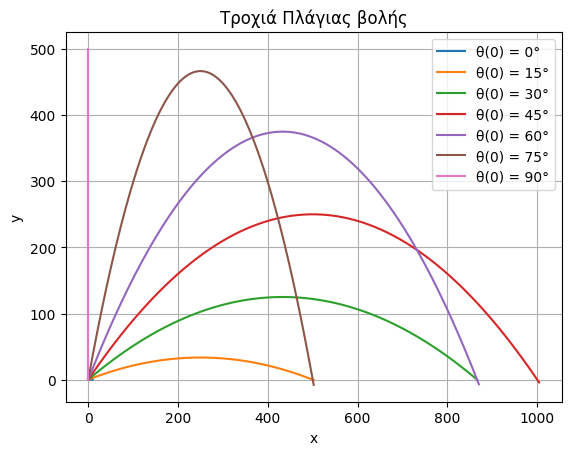

Το μέγιστο βεληνεκές είναι 1004.0916292849015 επιτυγχάνεται με αρχική γωνία ρίψης: 45.0°


In [2]:
import numpy as np
import matplotlib.pyplot as plt

g = 10
gamma_x = 0

def derivatives_x(t,x,v_x):
  dx_dt = v_x
  dv_dt = -gamma_x*v_x
  return dx_dt,dv_dt

def derivatives_y(t,y,v_y):
  dy_dt = v_y
  dv_dt = -g
  return dy_dt,dv_dt

# Runge Kutta για την x διευθυνση
def rk4_x(t0,x0,v0,h,t_max):
  n = (t_max - t0) / h
  t_values = [t0]
  x_values = [x0]
  vx_values = [v0]

  t=t0
  x=x0
  vx=v0

  while t<=t_max:
    k1_x, k1_v = derivatives_x(t,x,vx)
    k2_x, k2_v = derivatives_x(t+h/2,x+k1_x*h/2,vx+k1_v*h/2)
    k3_x, k3_v = derivatives_x(t+h/2,x+k2_x*h/2,vx+k2_v*h/2)
    k4_x, k4_v = derivatives_x(t+h,x+k3_x*h,vx+k3_v*h)

    x += (h/6)*(k1_x + 2*k2_x + 2*k3_x + k4_x)
    vx += (h/6)*(k1_v + 2*k2_v + 2*k3_v + k4_v)
    t+=h
    t_values.append(t)
    x_values.append(x)
    vx_values.append(vx)
  return np.array(t_values),np.array(x_values),np.array(vx_values)

# Runge Kutta για την y διευθυνση
def rk4_y(t0,y0,v0,h,t_max):
  n = (t_max - t0) / h
  t_values = [t0]
  y_values = [y0]
  vy_values = [v0]


  t=t0
  y=y0
  vy=v0

  while t<=t_max and y>=0:
    k1_y, k1_v = derivatives_y(t,y,vy)
    k2_y, k2_v = derivatives_y(t+h/2,y+k1_y*h/2,vy+k1_v*h/2)
    k3_y, k3_v = derivatives_y(t+h/2,y+k2_y*h/2,vy+k2_v*h/2)
    k4_y, k4_v = derivatives_y(t+h,y+k3_y*h,vy+k3_v*h)

    y += (h/6)*(k1_y + 2*k2_y + 2*k3_y + k4_y)
    vy += (h/6)*(k1_v + 2*k2_v + 2*k3_v + k4_v)
    t+=h
    t_values.append(t)
    y_values.append(y)
    vy_values.append(vy)
  return np.array(t_values),np.array(y_values),np.array(vy_values)

#Αρχικες συνθηκες
t_0 = 0
x_0 = 0
y_0 = 0
th_0 = np.linspace(0,np.pi/2,7)
v_0 = 100
vx_0 = v_0*np.cos(th_0)
vy_0 = v_0*np.sin(th_0)
x_max = []

for i in range(len(th_0)):
  t,y,vy = rk4_y(t_0,y_0,vy_0[i],0.1,100)
  t,x,vx = rk4_x(t_0, x_0,vx_0[i],0.1,100)
  x_max.append(np.max(x[:len(y)]))
  plt.plot(x[:len(y)],y, label="θ(0) = " + str(round(np.rad2deg(th_0[i]))) + "°")#Αν θελετε να δειτε την τροχια

plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Τροχιά Πλάγιας βολής")
plt.show()

print("Το μέγιστο βεληνεκές είναι " + str(np.max(x_max)) + " επιτυγχάνεται με αρχική γωνία ρίψης: " + str(round(np.rad2deg(th_0[np.argmax(x_max)]),2)) + "°")